 Netflix Dataset – Exploratory Data Analysis (EDA)

Objective
To understand, clean, analyze, and visualize the Netflix Movies & TV Shows dataset using Python.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
df = pd.read_csv("../data/netflix.csv")


In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Dataset Overview

In [4]:
df.shape

(8807, 12)

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Data Cleaning
In this section, we handle missing values and prepare the dataset for analysis.


In [9]:
# Fill missing categorical/text values
text_columns = ['director', 'cast', 'country']
df[text_columns] = df[text_columns].fillna("Unknown")

# Drop rows with missing date_added, rating, duration
df = df.dropna(subset=['date_added', 'rating', 'duration'])


In [10]:
df.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [12]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [13]:
df['year_added'] = df['date_added'].dt.year


In [14]:
df[['date_added', 'year_added']].head()


,date_added,year_added
0,2021-09-25,2021.0
1,2021-09-24,2021.0
2,2021-09-24,2021.0
3,2021-09-24,2021.0
4,2021-09-24,2021.0


 Netflix Content Added Over the Years


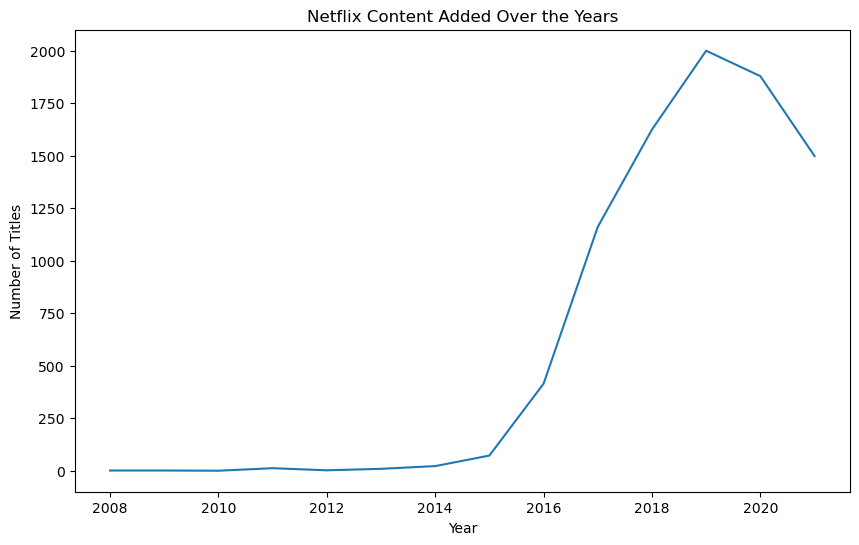

In [15]:
fig, ax = plt.subplots(figsize=(10,6))

df['year_added'].value_counts().sort_index().plot(kind='line', ax=ax)

ax.set_title("Netflix Content Added Over the Years")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Titles")

fig.savefig("../Images/Plots/content_over_years.png", dpi=300, bbox_inches="tight")
plt.show()


Insight
- Netflix significantly increased content additions between 2016 and 2019, reaching a peak around 2019, followed by a slight decline after 2020.


Top Countries Producing Netflix Content


In [20]:
country_df = df.copy()
country_df['country'] = country_df['country'].str.split(', ')
country_df = country_df.explode('country')


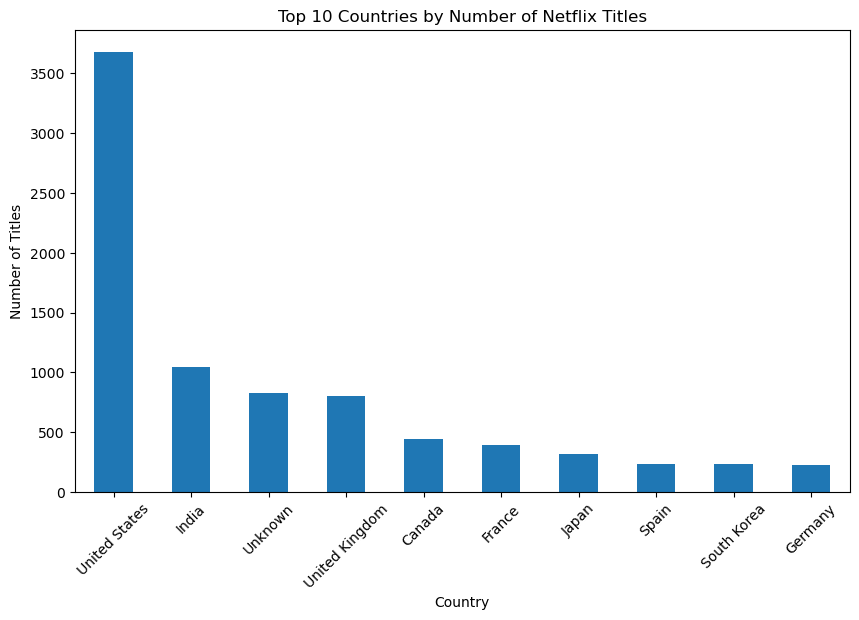

In [22]:
fig, ax = plt.subplots(figsize=(10,6))

country_df = df.copy()
country_df['country'] = country_df['country'].str.split(', ')
country_df = country_df.explode('country')

country_df['country'].value_counts().head(10).plot(kind='bar', ax=ax)

ax.set_title("Top 10 Countries by Number of Netflix Titles")
ax.set_xlabel("Country")
ax.set_ylabel("Number of Titles")
ax.tick_params(axis='x', rotation=45)

fig.savefig("../Images/Plots/top_countries.png", dpi=300, bbox_inches="tight")
plt.show()


Insight
- The United States contributes the highest number of Netflix titles by a wide margin, followed by India.
- A significant number of titles are associated with an "Unknown" country, indicating incomplete metadata in the dataset.
- Other countries such as the United Kingdom, Canada, and France contribute substantially fewer titles compared to the top contributors.


Content Ratings on Netflix


In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

df['rating'].value_counts().head(10).plot(kind='bar', ax=ax)

ax.set_title("Top 10 Content Ratings on Netflix")
ax.set_xlabel("Rating")
ax.set_ylabel("Number of Titles")
ax.tick_params(axis='x', rotation=45)

fig.savefig("../Images/Plots/content_ratings.png", dpi=300, bbox_inches="tight")
plt.show()


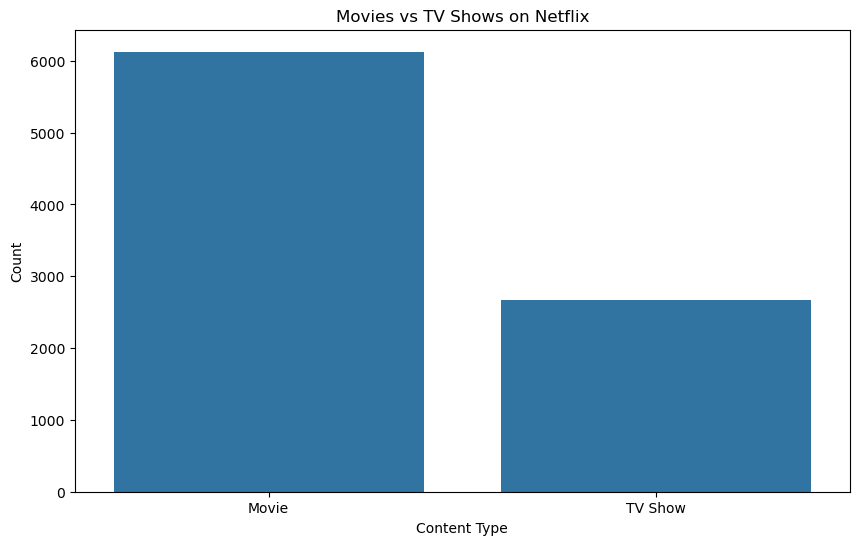

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")

plt.savefig("../Images/Plots/movies_vs_tv_shows.png", dpi=300, bbox_inches="tight")
plt.show()


Insight
- TV-MA and TV-14 dominate Netflix’s content library, indicating a strong focus on mature and teenage audiences.
- Family-friendly ratings such as TV-G and PG have significantly fewer titles, suggesting comparatively lower emphasis on children-oriented content.
